In [2433]:

"""
        copyright (c) 2012-2017 Oscar Riveros. all rights reserved.
                           oscar.riveros@peqnp.com

    without any restriction, Oscar Riveros reserved rights, patents and
  commercialization of this knowledge or derived directly from this work.

http://twitter.com/maxtuno
http://klout.com/maxtuno
http://independent.academia.edu/oarr

A O(n) UNT ALGORITHM FOR THE UNION-FIND PROBLEM
https://www.academia.edu/31682983/A_O_n_UNT_ALGORITHM_FOR_THE_UNION-FIND_PROBLEM
"""


class STCONN:
    def __init__(self):
        self.universe = []
        self.directions = []

    def nary(self, n, b=2):
        s = ''
        while n:
            s += str(n % b)
            n //= b
        return [idx for idx in range(len(s)) if s[idx] == '1']

    def union(self, a, b):
        element = (1 << a) | (1 << b)
        direction = (1 << ((a + 2) ** b))
        idx = 0
        while idx != len(self.universe):
            if self.universe[idx] & element and self.directions[idx] & direction:
                self.universe[idx] |= element
                element = self.universe[idx]
                del self.universe[idx]

                self.directions[idx] |= direction
                direction = self.directions[idx]
                del self.directions[idx]
                idx -= 1
            idx += 1
        self.universe.append(element)
        self.directions.append(direction)

    def connected(self, a, b):
        for item, direction in zip(self.universe, self.directions):
            if (item & (1 << a)) and (item & (1 << b)) and (direction & (1 << ((a + 2) ** b))):
                return self.nary(item)
        return []

    def get_universe(self):
        return [self.nary(element, 2) for element in self.universe]

In [2434]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

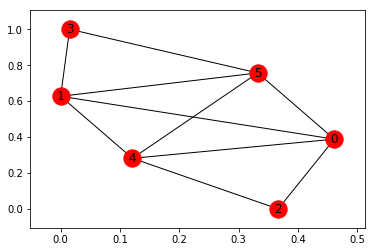

In [2439]:
size = 6

#G = nx.from_edgelist(np.random.randint(0, size, size=(size, 2)).tolist())
G = nx.random_geometric_graph(size, 0.5)
conn = STCONN()

edges = G.edges()
    
for a, b in edges:
    G.add_edge(a, b)
    conn.union(a, b)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, alpha=1)
plt.draw()

In [2441]:
nodes = []
for a in g.vertices():
    for b in g.vertices():
        if a != b:
            if stconn.connected(a, b):                
                print((a, b))

NameError: name 'g' is not defined

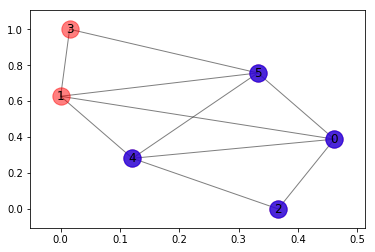

In [2440]:
nx.draw_networkx(G, pos=pos, alpha=0.5)
nx.draw_networkx_nodes(G, nodelist=cover, node_color='blue', pos=pos, alpha=0.7)
plt.show()
    

In [2432]:
list(nx.minimum_spanning_tree(G))

[0, 5, 2, 1, 4, 3]